In [1]:
import numpy as np
import sys
sys.path.insert(0, "..")
from farkas.solver import MILP, LP
from farkas.problem import QSHeur, MinimalWitness
from farkas.model import DTMC, MDP

In [2]:
M = DTMC.from_prism_model("datasets/brp.pm",
                          prism_constants={("N",2),("MAX",1)},
                          extra_labels={("uncertain","s=5 & srep=2"),("all","true")})

M = MDP.from_file("datasets/csma-2-2.lab", "datasets/csma-2-2.tra")
M

MDP(C=1054, N=1038, labels={init (1), deadlock (0), all_delivered (3), one_delivered (179), collision_max_backoff (2)})

In [3]:
# M.digraph()

In [4]:
reach_form,_ = M.reachability_form("init","all_delivered")
# DTMC.from_reachability_form(reach_form).digraph()

In [5]:
qs_min_heur = QSHeur(0.03,"min",solver_name="cbc")
results = list(qs_min_heur.solve(reach_form))
print("-- results --")
for idx, r in enumerate(results):
    print(r)

-- results --
ProblemResult(status=success, witness=MinimalWitness(system=ReachabilityForm(C=1054, N=1038, initial=0), states=246.0))
ProblemResult(status=success, witness=MinimalWitness(system=ReachabilityForm(C=1054, N=1038, initial=0), states=246.0))
ProblemResult(status=success, witness=MinimalWitness(system=ReachabilityForm(C=1054, N=1038, initial=0), states=246.0))


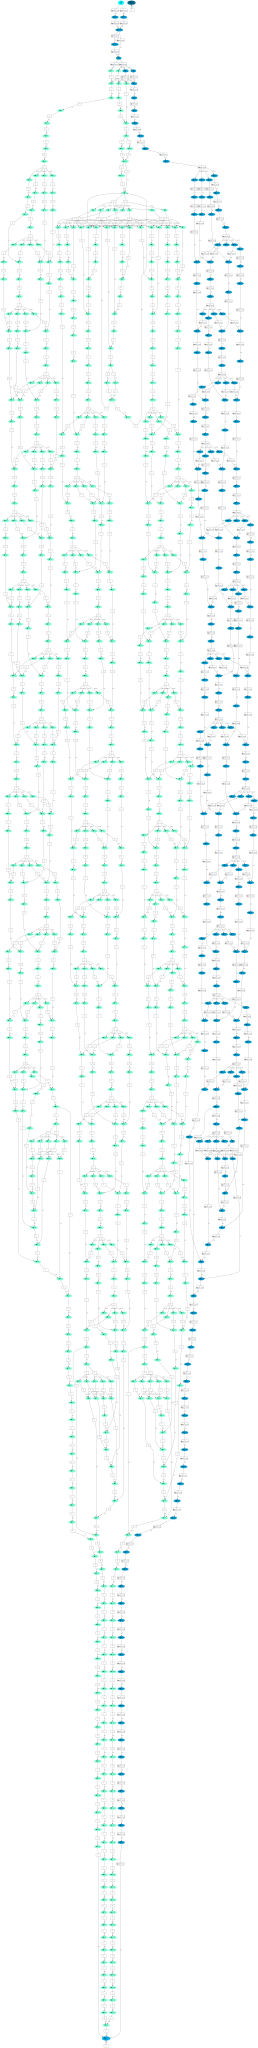

In [7]:
first = results[0]
first.witness.digraph()

In [8]:
qs_max_heur = QSHeur(0.03,"max",solver_name="cbc")
results = list(qs_max_heur.solve(reach_form))
print("-- results --")
for idx, r in enumerate(results):
    print(r)

-- results --
ProblemResult(status=success, witness=MinimalWitness(system=ReachabilityForm(C=1054, N=1038, initial=0), states=460.0))
ProblemResult(status=success, witness=MinimalWitness(system=ReachabilityForm(C=1054, N=1038, initial=0), states=440.0))
ProblemResult(status=success, witness=MinimalWitness(system=ReachabilityForm(C=1054, N=1038, initial=0), states=412.0))


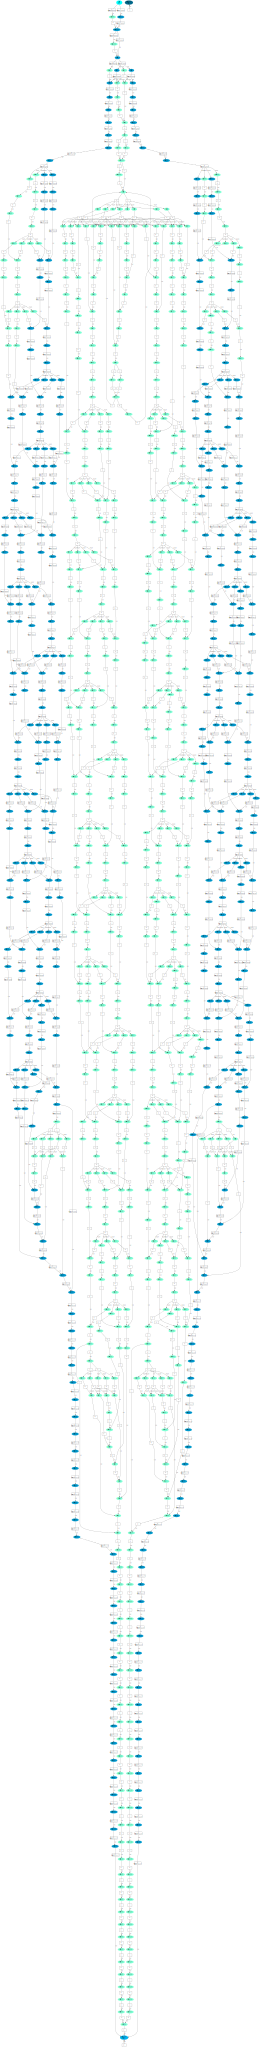

In [9]:
first = results[2]
first.witness.digraph()